In [58]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import *
from lmfit.models import LorentzianModel

['Time (s)', 'Signal']


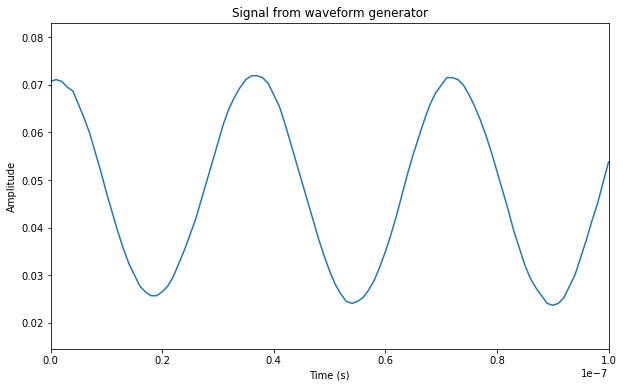

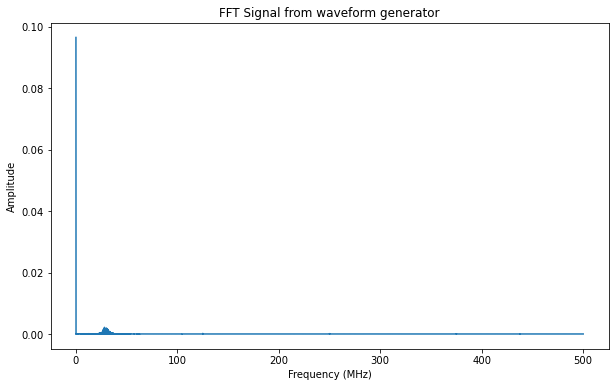

In [59]:
# Beat signal
sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230221/L28t1us.csv').iloc[0:,1:2]
#sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230212/N1t500us.csv').iloc[0:,1:2]
nsamples = len(sample)

# ----------------
# Time
# ----------------
dt = 1/1e9          #1.e-9
t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T

df_sample = pd.DataFrame(t)
df_sample['Signal']=sample


header = list(df_sample.columns)
print(header)

fig1,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_sample['Time (s)'],df_sample['Signal'],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,0.1e-6)
plt.title('Signal from waveform generator')
plt.show()

yf = fft(df_sample['Signal'].values)
xf = fftfreq(nsamples, dt)[:nsamples//2]

fig2,ax2 = plt.subplots(figsize=(10,6))
ax2.plot(xf*1e-6, 2.0/nsamples * np.abs(yf[0:nsamples//2]))
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1e-9)
#plt.grid()
plt.show()

In [60]:
df_sample

,Time (s),Signal
0,0.000000e+00,0.070675
1,1.000000e-09,0.071076
2,2.000000e-09,0.070675
3,3.000000e-09,0.069470
4,4.000000e-09,0.068667
...,...,...
131067,1.310670e-04,0.035337
131068,1.310680e-04,0.032125
131069,1.310690e-04,0.028912
131070,1.310700e-04,0.026503


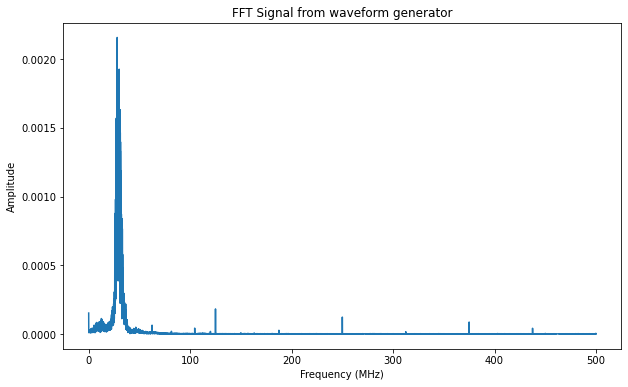

In [61]:
# Peakfinder

peaks, _ = find_peaks(2.0/nsamples * np.abs(yf[0:nsamples//2]))

peakfreq = pd.Series(xf[peaks]*1e-6,name='Frequency(MHz)')
peakamp = pd.Series(2.0/nsamples * np.abs(yf[0:nsamples//2])[peaks], name='Amplitude')

df_peak = pd.DataFrame(peakfreq)
df_peak['Amplitude']=peakamp

df_peak[df_peak.Amplitude > 0.00004]

fig3,ax3 = plt.subplots(figsize=(10,6))
# ax3.plot(df_peak['Frequency(MHz)'],df_peak['Amplitude'])
ax3.plot(peakfreq,peakamp)
plt.title('FFT Signal from waveform generator')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude')
# plt.xlim(0,1)
#plt.grid()
plt.show()

In [62]:
xf[:8]-xf[1:9]

array([-7629.39453125, -7629.39453125, -7629.39453125, -7629.39453125,
       -7629.39453125, -7629.39453125, -7629.39453125, -7629.39453125])

In [72]:
def sampleDataframe(C,n,times):
    a=5 if times ==5e-9 else 100 if times ==100e-9 else 500 if times==500e-6 else 1 if times==1e-6 else 10 if times==10e-3 else 1 if times ==1e-3 else 1 if times == 1e0 else print('No such file or directory')
    text='ns' if times==5e-9 else 'ns' if times==100e-9 else 'us' if times==500e-6 else 'us' if times==1e-6 else 'ms' if times==10e-3 else 'ms' if times==1e-3 else 's' if times==1e0 else 0   
    
    sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230221/'+str(C)+''+str(n)+'t'+str(a)+''+str(text)+'.csv').iloc[0:,1:2]
    textf='file name: '+str(C)+''+str(n)+'t'+str(a)+''+str(text)+''
    nsamples = len(sample)
    dt= 1.e-9 if times ==500e-6 else 1e-9 if times==100e-9 else 1e-9 if times==5e-9 else 1e-9 if times== 1e-6 else 1/500e6 if times==1e-3 else 1/50e6 if times==10e-3 else 1/2e6 if times==1e0 else 0
    dtr='dt: '+str(dt)+''

    t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T

    df_sample = pd.DataFrame(t)
    df_sample['Signal']=sample
    header = list(df_sample.columns)
    print(textf)
    print(dtr)
    return df_sample

#------------------------------------------------------------------------
def FFTData(C,n,times):
    a=5 if times ==5e-9 else 100 if times ==100e-9 else 500 if times==500e-6 else 1 if times==1e-6 else 10 if times==10e-3 else 1 if times ==1e-3 else 1 if times == 1e0 else print('No such file or directory')
    text='ns' if times==5e-9 else 'ns' if times==100e-9 else 'us' if times==500e-6 else 'us' if times==1e-6 else 'ms' if times==10e-3 else 'ms' if times==1e-3 else 's' if times==1e0 else 0   
    
    sample=pd.read_csv(r'D:/Thesis 4th year/Oscilloscope/230221/'+str(C)+''+str(n)+'t'+str(a)+''+str(text)+'.csv').iloc[0:,1:2]
    textf='file name: '+str(C)+''+str(n)+'t'+str(a)+''+str(text)+''
    
    nsamples = len(sample)
    dt= 1.e-9 if times ==500e-6 else 1e-9 if times==100e-9 else 1e-9 if times==5e-9 else 1e-9 if times== 1e-6 else 1/500e6 if times==1e-3 else 1/50e6 if times==10e-3 else 1/2e6 if times==1e0 else 0
    dtr='dt: '+str(dt)+''
    
    t = pd.Series([i*dt for i in range(nsamples)], name='Time (s)').T  
    df_sample = pd.DataFrame(t)
    df_sample['Signal']=sample
    header = list(df_sample.columns)
    
    yf = fft(df_sample['Signal'].values)
    xf = fftfreq(nsamples, dt)[:nsamples//2]
    
    # Peakfinder
    peaks, _ = find_peaks(2.0/nsamples * np.abs(yf[0:nsamples//2]))

    peakfreq = pd.Series(xf[peaks]*1e-6,name='Frequency(MHz)')
    peakamp = pd.Series(2.0/nsamples * np.abs(yf[0:nsamples//2])[peaks], name='Amplitude')

    df_peak = pd.DataFrame(peakfreq)
    df_peak['Amplitude']=peakamp
    df_peak[df_peak.Amplitude > 0.00000]
    
    return peakfreq,peakamp,textf,dtr

def lff(A):
    x=A[0]
    X=x
    Y=A[1].values.flatten()
    mod = LorentzianModel()
    pars = mod.guess(Y, x=X)
    out = mod.fit(Y, pars, x=X)
    #print(out.fit_report(min_correl=0.005))
    a=out.params['amplitude'].value
    c=out.params['center'].value
    s=out.params['sigma'].value
    f=out.params['fwhm'].value
    return a,c,s,f

def plotFFT(A,a,c,s,f):
    x=A[0]
    mu=c
    sigma=s
    fwhm=f
    lor=(a/(np.pi))*(sigma/((x-mu)**2+sigma**2))
    fig, ax = plt.subplots(figsize=(15, 9))
    plt.plot(A[0],A[1])
    plt.plot(A[0],lor,"--")
    #plt.xlim(0,50)
    return 

def FFTP(C,n,times):
    A=FFT3D(C,n,times)
    A1=lff(FFT3D(C,n,times))
    print('linewidth :',A1[3],'MHz')
    plotFFT(A,A1[0],A1[1],A1[2],A1[3])
    return print(A[2],A[3])

In [85]:
sampleDataframe('L',36,500e-6)

file name: L36t500us
dt: 1e-09


,Time (s),Signal
0,0.000000e+00,0.018472
1,1.000000e-09,0.018472
2,2.000000e-09,0.019275
3,3.000000e-09,0.020078
4,4.000000e-09,0.022487
...,...,...
131066,1.310660e-04,0.064250
131067,1.310670e-04,0.061037
131068,1.310680e-04,0.057022
131069,1.310690e-04,0.052203


linewidth : 4.413298221344628 MHz
file name: L36t500us dt: 1e-09


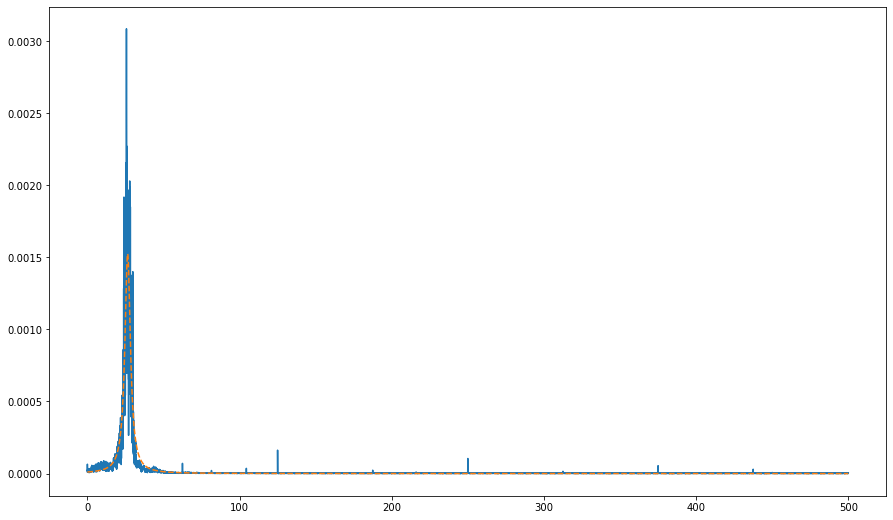

In [86]:
FFTP('L',36,500e-6)